In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Warm-up:
- Write a function with a for-loop inside a conditonal (or vice versa!)

In [2]:
x <- c(1,2,3,4,5)

In [6]:
for (i in x) {
    if (i %% 2 == 0) {
        print(i^2)
    } else {
        print(i)
    }
}

[1] 1
[1] 4
[1] 3
[1] 16
[1] 5


In [11]:
square_even_identity_odd <- function (x) {
    for (i in seq_along(x)) {
        if (x[[i]] %% 2 == 0) {
            x[[i]] <- x[[i]]^2
        }
    }
    x
}

In [14]:
x
square_even_identity_odd(x)
x

[1] 1 2 3 4 5

[1]  1  4  3 16  5

[1] 1 2 3 4 5

## Global vs. Local Variables

In [15]:
x <- 3
plus_one <- function(x) {
    x+1
}

What will happen in the following two lines?

In [18]:
plus_one(0)
x

[1] 1

[1] 3

- Inside the function, the variable ```x``` is a **local** variable, with value determined by the input
- Outside the function, the variable ```x``` is a **global** variable, with value assigned to be ```3```

In [26]:
y <- 2
add_y <- function(x) {
    x+y
}

In [27]:
add_y(5)

[1] 7

- Inside of ```add_y()```, the variable ```x``` is local and ```y``` is global
- If a function cannot find a variable in its local environment, it will look in the global environment

In [28]:
# don't do this
do_not <- function(x) {
    do_not <- function(x) {
        x+100
    }
    do_not(x)
}
do_not(1)

[1] 101

- Inside of the local function environment for ```do_not()``` is the function ```do_not()``` which is only defined inside of the local environment
- Try to avoid:
 * Using global variables inside of functions
 * Naming local variables in function environments the same as other global variables
 * Overwriting function names from base R or tidyverse

In [29]:
y <- 2
add_two <- function(x,z) {
    x+z
}

## Arguments of functions
- We can specify arguments in different ways
 * Position
 * Exact Matching

In [30]:
print_three <- function(x,y,z) {
    print(x)
    print(y)
    print(z)
}

In [33]:
print_three(1,2,3)

[1] 1
[1] 2
[1] 3


In [35]:
print_three(x = 1, y = 2, z = 3)

[1] 1
[1] 2
[1] 3


In [36]:
print_three(2, 3, x=1)

[1] 1
[1] 2
[1] 3


In [ ]:
inner_join(tib1, tib2, by = "var")

You can also specify optional arguments in functions

In [50]:
print_three <- function(x,y,z, print_last=TRUE) {
    print(x)
    print(y)
    if (print_last) {print(z)}
}

In [51]:
print_three(1,2)

[1] 1
[1] 2


ERROR: Error in print(z): argument "z" is missing, with no default


In [38]:
print_three(1,2,3)

[1] 1
[1] 2
[1] 3


In [41]:
print_three(1,2,3, print_last=FALSE)
print_three(1,2,3,FALSE)

[1] 1
[1] 2
[1] 1
[1] 2


In [ ]:
# pseudo-code
# aes <- function(x,y,color=FALSE) {
            # if (color==FALSE) {
                    #do nothing
#              } else { graph by color}
#}

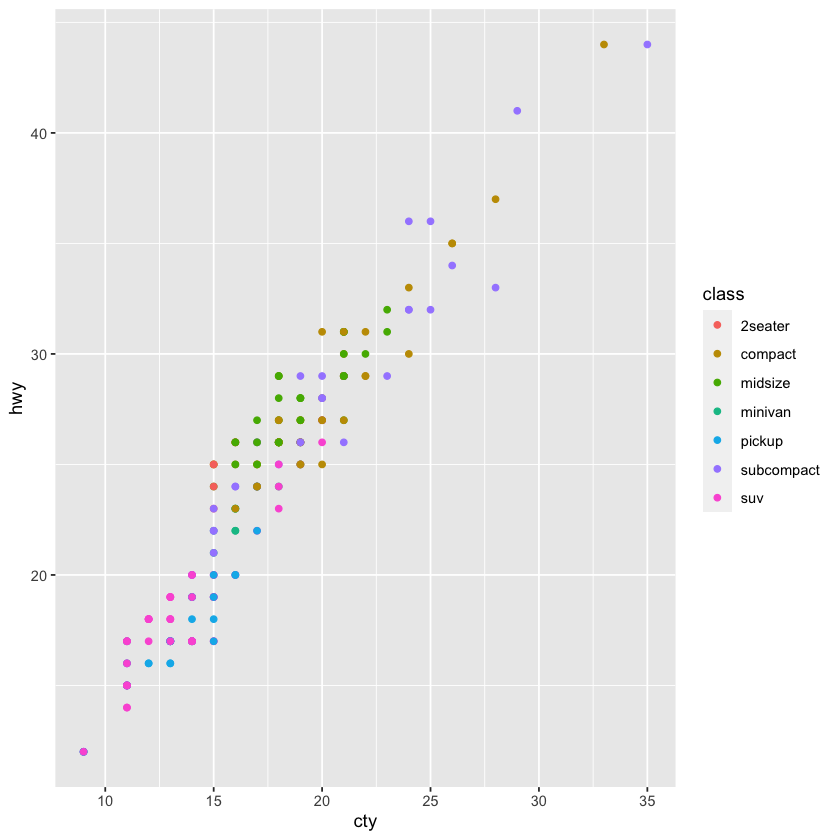

In [49]:
ggplot(mpg, aes(x=cty, y=hwy, color=class, by=, alpha= )) + geom_point()

In [54]:
# possible, but not great practice
# try to use exact matching with optional arguments
print_three(1,2,3,FALSE)

[1] 1
[1] 2


You can create a function with arbritrarily many arguments

In [55]:
sum_then_one <- function(...){
    sum(...)+1
}

In [57]:
sum_then_one(1,2)
sum_then_one(1,2,3)
sum_then_one(1,2,100,100,100)
sum_then_one()

[1] 4

[1] 7

[1] 304

[1] 1

You can also "end" functions early with ```return()```

In [60]:
# useful for special cases when the rest of the function is too long for a simple if...else
random_calc <- function(x) {
    
    if (identical(x, 0)) return("Cannot divide by zero.")
    
    y <- 1/x
    1/y + 1
}

In [62]:
# this is an equivalent function
random_calc <- function(x) {
    
    if (identical(x, 0)){
        "Cannot divide by zero."
    } else {
        y <- 1/x
        1/y + 1
    }
}

In [63]:
random_calc(0)
random_calc(10)

[1] "Cannot divide by zero."

[1] 11

## Functionals: Map
- A functional is a "function" that takes as input another function
- A common for-loop is to iterate over a vector/list, change each element, and return the altered vector/list
- The functions below streamline this common for-loop
 * ```map()``` outputs a list
 * ```map_dbl()``` outputs a double vector
 * ```map_int()``` outputs an integer vector
 * ```map_lgl()``` outputs a logical vector
 * ```map_chr()``` outputs a character vector

In [64]:
plus_one <- function(x) {x+1}

In [65]:
# I can use a for loop
plus_one_vec <- function(v) {
    for (i in seq_along(v)) {
        v[[i]] <- plus_one(v[[i]])
    }
    v
}

x <- c(1,2,3,4,5)
plus_one_vec(x)

[1] 2 3 4 5 6

In [66]:
# or I can use the map function
# this applies the function "plus_one" to each element of x
map_dbl(x, plus_one)

[1] 2 3 4 5 6

In [68]:
# for each column, determine if it is a numeric vector
map_lgl(diamonds, is.numeric)

carat     cut   color clarity   depth   table   price       x       y       z 
   TRUE   FALSE   FALSE   FALSE    TRUE    TRUE    TRUE    TRUE    TRUE    TRUE

Attempt:
- Write a function which takes in a column of a tibble and outputs the mean if it is numeric and 0 otherwise
- Use the ```map_dbl``` to apply this to a single tibble

In [69]:
col_mean <- function(col){
    if (is.numeric(col)){
        mean(col)
    } else {
        0
    }
}

In [72]:
map_dbl(diamonds, col_mean)

carat          cut        color      clarity        depth        table 
   0.7979397    0.0000000    0.0000000    0.0000000   61.7494049   57.4571839 
       price            x            y            z 
3932.7997219    5.7311572    5.7345260    3.5387338

In [73]:
x <- rep(0, length(diamonds))
for (i in seq_along(diamonds)){
    x[[i]] <- col_mean(diamonds[[i]])
}
x

[1]    0.7979397    0.0000000    0.0000000    0.0000000   61.7494049
 [6]   57.4571839 3932.7997219    5.7311572    5.7345260    3.5387338